In [2]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('Wine.csv')#reading features.csv file from file path dataset related to policy and claim,,wwther the policy holder will claim or not
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
x.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
x.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [7]:
from sklearn.model_selection import train_test_split

xtrain,xtest=train_test_split(x,train_size=0.8,random_state=4)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [9]:
xtrain.shape

(142, 13)

In [10]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
xtrain=pca.fit_transform(xtrain)
xtest=pca.transform(xtest)

In [12]:
xtrain.shape

(142, 2)

In [14]:
sum(pca.explained_variance_ratio_)

0.5487201070545018

In [15]:
from sklearn.cluster import KMeans
#Elbow method
wcss_list=[]#creating empty list to store wcss values

for i in range(1,11):#giving range to create no.of cluster in range 1 to 10

    model=KMeans(n_clusters=i)
    model.fit(x)
    wcss=model.inertia_#inertia is an attribute in Kmeans 
    wcss_list.append(wcss)
    
wcss_list

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[17592296.383508474,
 4543749.614531861,
 2370689.686782969,
 1332043.8610845525,
 916379.1871539169,
 647326.0020260848,
 414752.87383925024,
 323211.5526346544,
 270954.9292415376,
 225393.78256329466]

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabels'

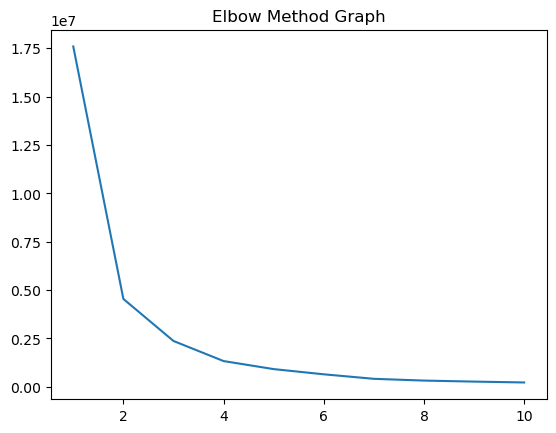

In [16]:
plt.plot(range(1,11),wcss_list)
plt.title('Elbow Method Graph')
plt.xlabels('No of Clusters')
plt.ylabels('WCSS')
plt.show()

In [29]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(xtrain)
pred=kmeans.predict(xtest)
pred[:5]

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 1, 1, 0])

In [30]:
kmeans.cluster_centers_

array([[ 0.33282354,  1.77827571],
       [-2.15520053, -0.76564228],
       [ 2.82116747, -1.34949265]])

In [20]:
x.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
pd.DataFrame(xtest).head()

,0,1
0,2.711002,-0.763061
1,3.059851,-0.484380
2,-4.231892,-2.059790
3,-1.097003,-1.763941
4,-0.897088,1.453452


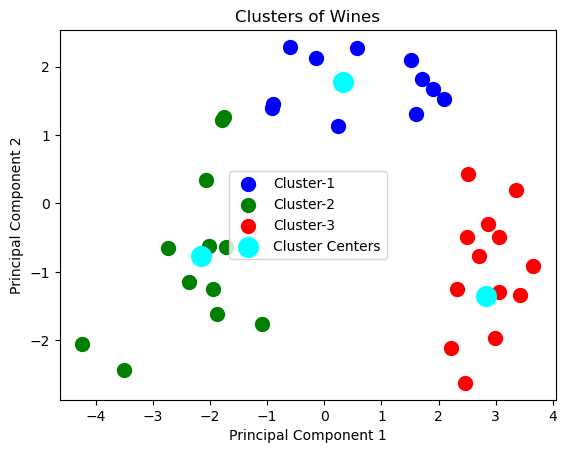

In [32]:
import matplotlib.pyplot as plt

plt.scatter(xtest[pred==0,0],xtest[pred==0,1],s=100,c='blue',label='Cluster-1')
plt.scatter(xtest[pred==1,0],xtest[pred==1,1],s=100,c='green',label='Cluster-2')
plt.scatter(xtest[pred==2,0],xtest[pred==2,1],s=100,c='red',label='Cluster-3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s=200,c='cyan',label='Cluster Centers')
plt.title('Clusters of Wines')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()